In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_30/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>

# LAB: Evaluación de Modelos

## 1. Introducción

El objetivo de este LAB es realizar la evaluación de un modelos de clasificación partiendo "desde cero". Para ello, usaremos datos de transacciones inmobiliaras en Sacramento.



Importemos los paquetes requeridos:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Carguemos el dataset de Sacramento:

In [3]:
sac = pd.read_csv('../Data/Sacramentorealestatetransactions.csv')

Primero hagan un checkeo de la "sanidad" de los datos (por ejemplo, pueden evaluar si hay variables con datos nulos)

In [4]:
sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
sac.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [6]:
sac.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [7]:
sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


Crear una variable binaria en la cual:

+ $Y = 1$ indica que la casa fue vendida por encima de 200.000 dólares
+ $Y = 0$ indica que la casa fue vendida por igual o menos de 200.000 dólares

Quedarse con las siguientes variables: `number of beds`, `baths`, `sq_ft` y el indicador de precio que generamos en el paso anterior

In [9]:
cols = ['beds','baths','sq__ft']
X = sac[cols]

In [10]:
y = sac['price'] > 200000

In [11]:
y.value_counts()

True     538
False    447
Name: price, dtype: int64

Dividan el dataset entre training y test sets. Los predictores son `beds`, `baths` y `sq ft`. El target es la variable de precio.
El tamaño del test set debe ser 33% y (opcionalmente) pueden intentar estratificar por el target.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [13]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Fitear un modelo de regresión logística:

In [14]:
logreg = LogisticRegression(C=1e10)

In [15]:
logreg.fit(X_train, y_train)

LogisticRegression(C=10000000000.0)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
y_pred = logreg.predict(X_test)

Imprimir la matriz de confusión:

In [18]:
y_test.value_counts()

True     135
False    112
Name: price, dtype: int64

In [19]:
conmat = np.array(confusion_matrix(y_test, y_pred))

confusion = pd.DataFrame(conmat, index=['under_200k', 'over_200k'],
                         columns=['predicted_under_200k','predicted_over_200k'])

print(confusion)

            predicted_under_200k  predicted_over_200k
under_200k                    45                   67
over_200k                     42                   93


Calcular la proporción de casos correctamente clasificados, la precisión y el recall.

In [20]:
print('Accuracy=', accuracy_score(y_test, y_pred))
print('Recall=', recall_score(y_test, y_pred))
print('Precision=', precision_score(y_test, y_pred))

Accuracy= 0.5587044534412956
Recall= 0.6888888888888889
Precision= 0.58125


¿Qué dicen estas tres medidas acerca del modelo?

Supongamos que un vendedor inmboliario quiere priorizar minimizar los falsos positivos (predecir que una casa se va a vender por encima de \$200.000 cuando en realidad se vende por menos) porque este tipo de errores le hacen "perder plata".

Cambiar el umbral de decisión para **bajar la tasa de falsos positivos** e imprimir nuevamente la matriz de confusión.

In [21]:
probs = logreg.predict_proba(X_test)
probs_1 = probs[:,1]

In [22]:
y_pred_2 = probs_1 > 0.7

In [23]:
confusion_matrix(y_test, y_pred_2)

array([[111,   1],
       [ 99,  36]])

In [24]:
print('Accuracy=', accuracy_score(y_test, y_pred_2))
print('Recall=', recall_score(y_test, y_pred_2))
print('Precision=', precision_score(y_test, y_pred_2))

Accuracy= 0.5951417004048583
Recall= 0.26666666666666666
Precision= 0.972972972972973


* ¿Cuál sería el lado "negativo" de bajar la tasa de falsos positivos?

Graficar la curva ROC usando las funciones provistas más arriba.

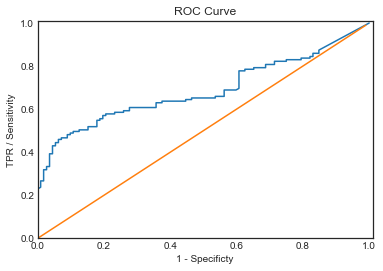

In [31]:
fpr,tpr,_ = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show() 

In [26]:
auc(fpr,tpr)

0.6864748677248678

**Bonus:** ¿Cuándo pueden ser las métricas precision y recall más útiles que la curva ROC?

Tienden a ser más útiles cuando la proporción de casos positivos es menor, dado que ambas métricas son sensibles a esto.

## BONUS: Evaluar otros modelos

Evaluar otros clasificadores además de una regresión logística para este dataset.

In [27]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

In [28]:
nbc.fit(X_train, y_train)
y_preds_nb = nbc.predict(X_test)
y_probs_nb = nbc.predict_proba(X_test)

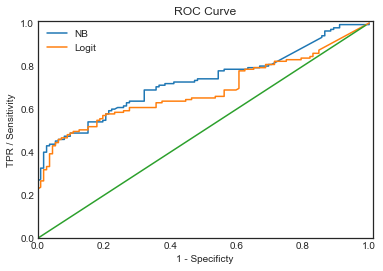

In [29]:
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs_nb[:,1])
fpr_log,tpr_log,thr_log = roc_curve(y_test, probs[:,1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show()

In [30]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.7284722222222223
AUC-Logit= 0.6864748677248678
